# Data Description
Scrapped from twitters from 2016-01-01 to 2019-03-29, Collecting Tweets containing Bitcoin or BTC

# Exploratory Data Analysis

## 1. Crypto Sentiments

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import zipfile

import sys
sys.path.insert(0,'/content/drive/MyDrive') # https://medium.com/analytics-vidhya/importing-your-own-python-module-or-python-file-into-colab-3e365f0a35ec
import helper_func_v2_20220416 as hf

### 1-1. Data Cleaning

In [ ]:
# read in the file
df = hf.read_zip_csv_chunk(
    filepath = '/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/16mil_tweets.csv.zip',
    filename = 'tweets.csv',
    chunksize = 500000
)


Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5
Processing Chunk No. 6
Processing Chunk No. 7
Processing Chunk No. 8
Processing Chunk No. 9
Processing Chunk No. 10
Processing Chunk No. 11
Processing Chunk No. 12
Processing Chunk No. 13
Processing Chunk No. 14
Processing Chunk No. 15
Processing Chunk No. 16
Processing Chunk No. 17
Processing Chunk No. 18
Processing Chunk No. 19
Processing Chunk No. 20
Processing Chunk No. 21
Processing Chunk No. 22
Processing Chunk No. 23
Processing Chunk No. 24
Processing Chunk No. 25
Processing Chunk No. 26
Processing Chunk No. 27
Processing Chunk No. 28
Processing Chunk No. 29
Processing Chunk No. 30
Processing Chunk No. 31
Processing Chunk No. 32
Processing Chunk No. 33
Processing Chunk No. 34
The dataset's shape:  (16889765, 9)


In [ ]:
# drop the unused columns
df = df[['id','user','timestamp','replies','likes','retweets','text\r']]
df.columns = ['id','user','timestamp','replies','likes','retweets','text']

In [ ]:
# reduce the memory
df = hf.reduce_mem(df)

902.01 Mb, 644.29 Mb (28.57 %)


#### 1-1-2. Date

In [ ]:
from datetime import datetime, date, time, timedelta

df['date'] = list(map(lambda time:pd.Timestamp.date(pd.Timestamp(time)), df.timestamp))
df['year_month'] = list(map(lambda x:str(x.year)+"-"+str(x.month), df.date))
df['year'] = list(map(lambda x:x.year, df.date)) 
df['month'] = list(map(lambda dt:dt.month, df.date))
df = df.drop(['timestamp'],axis = 1)

In [ ]:
# trial code
from datetime import datetime, date, time, timedelta

# df['date'] = list(map(lambda x: datetime.strptime(x,"%Y-%m-%d"),df.date))
df['year_month'] = list(map(lambda x:str(x.year)+"-"+str(x.month), df.date))
df['year'] = list(map(lambda x:x.year, df.date)) 

#### 1-1-2. Text
- Drop the tweets with non-English text
- Drop the tweets with null text

In [ ]:
# Great! There is no null text
print("Null text tweets count: ", df.text.isnull().sum())
df = df[~df.text.isnull()]

Null text tweets count:  0


In [ ]:
!pip install whatthelang

In [ ]:
from whatthelang import WhatTheLang
wtl = WhatTheLang()
result = [wtl.predict_lang(row) for row in df['text']]
df['lang'] = result
# df.groupby("lang")['id'].count().sort_values(ascending = False)
df.head()

In [ ]:
# Keep only the tweets in English
df = df[df["lang"] == 'en']
df.shape

#### Output the Cleaned csv

In [ ]:
en_df.to_csv(r'clean_16M_btc_tweets.csv')

path = '/content/drive/My Drive/clean_16M_btc_tweets.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [ ]:
en_df.to_csv(r'clean_16M_btc_tweets.csv')

path = '/content/drive/My Drive/clean_16M_btc_tweets.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

### 1-2. Data Exploration

#### 1-2-1. Data Processing

In [10]:
# Read in the clean csv (English only)
def read_csv_chunk(filepath,chunksize):
    num_of_chunk = 0

    df = pd.DataFrame()

    for chunk in pd.read_csv(filepath,lineterminator='\n',
                             chunksize=chunksize):
        num_of_chunk += 1
        df = pd.concat([df, chunk], axis=0)
        print('Processing Chunk No. ' + str(num_of_chunk))     

    print("The dataset's shape: ", df.shape)
    df.reset_index(inplace=True)
    return df

df = read_csv_chunk('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/clean_16m_btc_tweets.csv',500000)

Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5
Processing Chunk No. 6
Processing Chunk No. 7
Processing Chunk No. 8
Processing Chunk No. 9
Processing Chunk No. 10
Processing Chunk No. 11
Processing Chunk No. 12
Processing Chunk No. 13
Processing Chunk No. 14
Processing Chunk No. 15
Processing Chunk No. 16
Processing Chunk No. 17
Processing Chunk No. 18
Processing Chunk No. 19
Processing Chunk No. 20
Processing Chunk No. 21
Processing Chunk No. 22
Processing Chunk No. 23
Processing Chunk No. 24
Processing Chunk No. 25
Processing Chunk No. 26
Processing Chunk No. 27
The dataset's shape:  (13086448, 10)


In [11]:
from datetime import datetime, date, time, timedelta
# Additional Data Processing

# After diving into the tweet content details and cross checking with the platform
# I decided to drop all the 220 tweets before 2012-01-01, I suspect that the API calling returns incomplete datasets (incontinuous date)
df = df[df.date>='2012-01-01']
df = hf.reduce_mem(df)

df['date'] = list(map(lambda x: datetime.strptime(x,"%Y-%m-%d"),df.date))
df['year_month'] = list(map(lambda x:str(x.year)+"-"+str(x.month), df.date))
df['year'] = list(map(lambda x:x.year, df.date)) 


1198.08 Mb, 811.20 Mb (32.29 %)


In [ ]:
hf.view(df)

The dataset consists of 13086228 rows and 13 columns
The columns are: ['index', 'Unnamed: 0', 'id', 'user', 'replies', 'likes', 'retweets', 'text', 'date', 'month', 'lang', 'year_month', 'year']


,index,Unnamed: 0,id,user,replies,likes,retweets,text,date,month,lang,year_month,year
data_types,int32,int32,float32,object,int32,int32,int32,object,datetime64[ns],int8,object,object,int64
value_counts,13086228,13086228,1709043,1093160,936,3055,1712,11944874,2883,12,1,95,8
null_counts,0,0,0,1,0,0,0,0,0,0,0,0,0
0,0,1,1132977050873757696.0,bitcointe,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27 00:00:00,5,en,2019-5,2019
1,1,2,1132977050873757696.0,3eyedbran,0,2,1,Another Test tweet that wasn't caught in the s...,2019-05-27 00:00:00,5,en,2019-5,2019
2,2,3,1132977119593234432.0,DetroitCrypto,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27 00:00:00,5,en,2019-5,2019


In [1]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# from nltk.stem import PorterStemmer
# import re

#### 1-2-2. Time Series Trend
- Total number of BTC tweets per month
- Average number of likes per BTC tweet
- Average number of retweets per BTC tweet



In [ ]:
# pd.set_option('display.max_rows', None)
# df.groupby('date')['id'].count().sort_index()

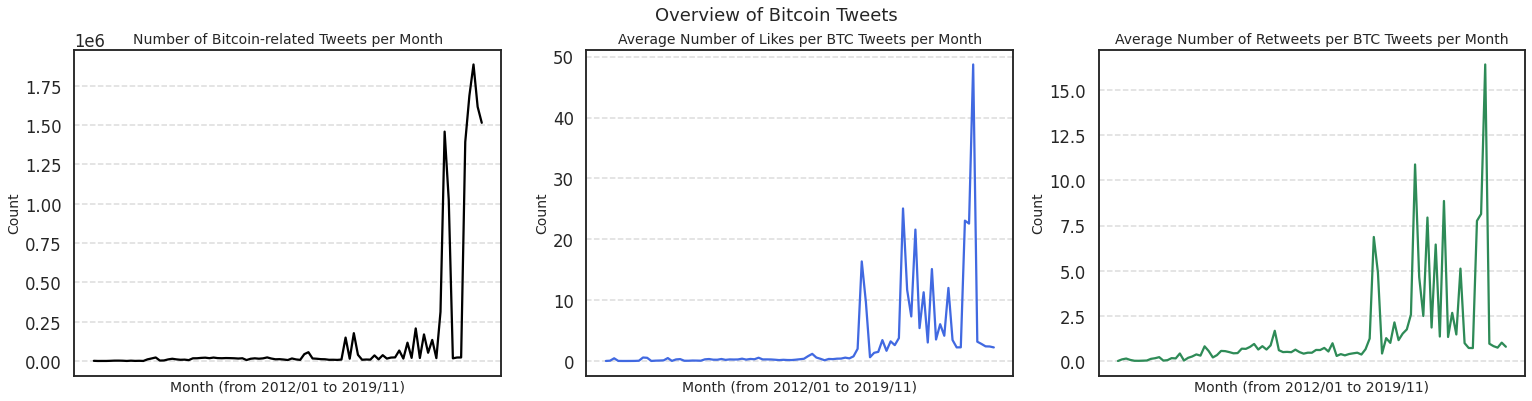

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

ts_grouped_df = df.groupby("year_month").agg({'id':"count",'likes':"sum",'retweets':"sum"}).reset_index()
ts_grouped_df.columns = ['year_month','btc_tweets_cnt','total_btc_tweets_likes','total_btc_tweets_retweets']
ts_grouped_df['avg_btc_tweets_likes'] = ts_grouped_df.total_btc_tweets_likes/ts_grouped_df.btc_tweets_cnt
ts_grouped_df['avg_btc_tweets_retweets'] = ts_grouped_df.total_btc_tweets_retweets/ts_grouped_df.btc_tweets_cnt


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 6))


sns.lineplot(x='year_month', y='btc_tweets_cnt',
              data=ts_grouped_df,ax=axes[0],
            color = 'black')
axes[0].set_title(f"Number of Bitcoin-related Tweets per Month",fontsize=14)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[0].set_ylabel(f"Count",fontsize = 14)
axes[0].set_xticks(())
axes[0].grid(linestyle="--", alpha=0.7)

sns.lineplot(x='year_month', y='avg_btc_tweets_likes',
              data=ts_grouped_df,ax=axes[1],
            color = 'royalblue')
axes[1].set_title(f"Average Number of Likes per BTC Tweets per Month",fontsize=14)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[1].set_ylabel(f"Count",fontsize = 14)
axes[1].set_xticks(())
axes[1].grid(linestyle="--", alpha=0.7)


sns.lineplot(x='year_month', y='avg_btc_tweets_retweets',
              data=ts_grouped_df,ax=axes[2],
            color = 'seagreen')
axes[2].set_title(f"Average Number of Retweets per BTC Tweets per Month",fontsize=14)
axes[2].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[2].set_ylabel(f"Count",fontsize = 14)
axes[2].set_xticks(())
axes[2].grid(linestyle="--", alpha=0.7)

fig.suptitle("Overview of Bitcoin Tweets", fontsize = 18)
plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_crypto_lineplot.png',dpi=300)
plt.show()


In [ ]:
# ts_grouped_df = df.groupby("year").agg({'id':"count",'likes':"sum",'retweets':"sum"}).reset_index()
# ts_grouped_df.columns = ['year','btc_tweets_cnt','total_btc_tweets_likes','total_btc_tweets_retweets']
# ts_grouped_df['avg_btc_tweets_likes'] = ts_grouped_df.total_btc_tweets_likes/ts_grouped_df.btc_tweets_cnt
# ts_grouped_df['avg_btc_tweets_retweets'] = ts_grouped_df.total_btc_tweets_retweets/ts_grouped_df.btc_tweets_cnt

# ts_grouped_df.sort_values(by='year',ascending = True)

## 2. Cost of Living
Data Source: [U.S.Buereau of Labor Statistics - CPI-U](https://data.bls.gov/home.htm)

### 2-1. Data Cleaning & Processing

In [7]:
# Load CPI data
cpi_df = pd.read_csv("/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/bls_cpi_2012_2019.csv",sep=',')

# Basic Transformation & Cleaning
cpi_df = cpi_df.drop(['HALF1','HALF2'],axis =1)
cpi_df = cpi_df.set_index(['Year']).stack().reset_index()
cpi_df.columns = ['year','month','cpi']

# Month Index
month_dict = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
cpi_df["month_ind"] = list(map(lambda mon: month_dict[mon], cpi_df['month']))
cpi_df['year_month'] = list(map(lambda x,y:str(x)+"-"+str(y),cpi_df.year,cpi_df.month_ind))
# Drop 2019-Dec (due to tweet constraint)
cpi_df = cpi_df[(cpi_df.year<=2019)&(~((cpi_df.year==2019)&(cpi_df.month_ind==12))) ]

# overview
hf.view(cpi_df)

The dataset consists of 95 rows and 5 columns
The columns are: ['year', 'month', 'cpi', 'month_ind', 'year_month']


,year,month,cpi,month_ind,year_month
data_types,int64,object,float64,int64,object
value_counts,8,12,95,12,95
null_counts,0,0,0,0,0
0,2012,Jan,226.665,1,2012-1
1,2012,Feb,227.663,2,2012-2
2,2012,Mar,229.392,3,2012-3


In [8]:
# pd.set_option('display.max_rows', 100)
# Calculate the month-over-month diff and year-over-year diff
cpi_df = cpi_df.sort_values(by=['year','month_ind'])
cpi_df['cpi_month_diff']= cpi_df.cpi.diff()
cpi_df['cpi_year_diff'] = cpi_df.cpi.diff(12)
cpi_df['cpi_MoM'] = list(map(lambda x,y:x/(x-y),
                         cpi_df.cpi,
                         cpi_df.cpi_month_diff))
cpi_df['cpi_YoY'] = list(map(lambda x,y:x/(x-y),
                         cpi_df.cpi,
                         cpi_df.cpi_year_diff))

### 2-2. Data Exploration

#### 2-2-1. Time Series Trend
- CPI
- CPI MoM
- CPI YoY

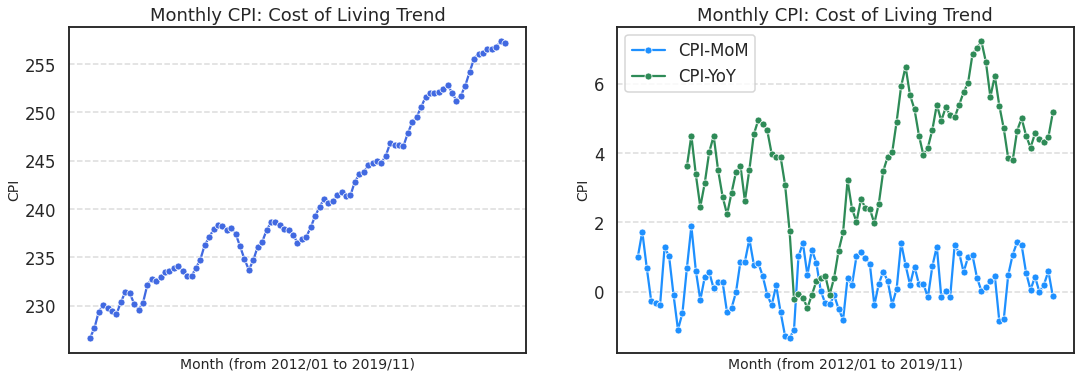

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.lineplot(x='year_month', y='cpi', marker= "o", markersize = 7,
              data=cpi_df, ax=axes[0],
            color = 'royalblue'
            )
axes[0].set_title(f"Monthly CPI: Cost of Living Trend",fontsize=18)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[0].set_ylabel('CPI',fontsize = 14)
axes[0].set_xticks(())
axes[0].grid(linestyle="--", alpha=0.7)

sns.lineplot(x='year_month', y='cpi_month_diff', marker= "o", markersize = 7,
              data=cpi_df, ax=axes[1],
            color = 'dodgerblue',label = 'CPI-MoM',
            )
sns.lineplot(x='year_month', y='cpi_year_diff', marker= "o", markersize = 7,
              data=cpi_df, ax=axes[1],
            color = 'seagreen',label = 'CPI-YoY',
            )
axes[1].set_title(f"Monthly CPI: Cost of Living Trend",fontsize=18)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[1].set_ylabel('CPI',fontsize = 14)
axes[1].set_xticks(())
axes[1].grid(linestyle="--", alpha=0.7)

plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_cost_lineplot.png',dpi=300)
plt.show()

In [ ]:
cpi_df

,year,month,cpi,month_ind,year_month,cpi_month_diff,cpi_year_diff,cpi_MoM,cpi_YoY
0,2012,Jan,226.665,1,2012-1,NaN,NaN,NaN,NaN
1,2012,Feb,227.663,2,2012-2,0.998,NaN,1.004403,NaN
2,2012,Mar,229.392,3,2012-3,1.729,NaN,1.007595,NaN
3,2012,Apr,230.085,4,2012-4,0.693,NaN,1.003021,NaN
4,2012,May,229.815,5,2012-5,-0.270,NaN,0.998827,NaN
5,2012,Jun,229.478,6,2012-6,-0.337,NaN,0.998534,NaN
6,2012,Jul,229.104,7,2012-7,-0.374,NaN,0.998370,NaN
7,2012,Aug,230.379,8,2012-8,1.275,NaN,1.005565,NaN
8,2012,Sep,231.407,9,2012-9,1.028,NaN,1.004462,NaN
9,2012,Oct,231.317,10,2012-10,-0.090,NaN,0.999611,NaN


## 3. Correlation: Cost of Living vs. Crypto Sentiments

In [9]:
ts1 = pd.merge(left = ts_grouped_df, right = cpi_df, how = 'inner', on = 'year_month')
hf.view(ts1)

The dataset consists of 95 rows and 14 columns
The columns are: ['year_month', 'btc_tweets_cnt', 'total_btc_tweets_likes', 'total_btc_tweets_retweets', 'avg_btc_tweets_likes', 'avg_btc_tweets_retweets', 'year', 'month', 'cpi', 'month_ind', 'cpi_month_diff', 'cpi_year_diff', 'cpi_MoM', 'cpi_YoY']


,year_month,btc_tweets_cnt,total_btc_tweets_likes,total_btc_tweets_retweets,avg_btc_tweets_likes,avg_btc_tweets_retweets,year,month,cpi,month_ind,cpi_month_diff,cpi_year_diff,cpi_MoM,cpi_YoY
data_types,object,int64,int32,int32,float64,float64,int64,object,float64,int64,float64,float64,float64,float64
value_counts,95,95,94,95,95,95,8,12,95,12,94,82,94,83
null_counts,0,0,0,0,0,0,0,0,0,0,1,12,1,12
0,2012-1,1549,10,28,0.006456,0.018076,2012,Jan,226.665,1,NaN,NaN,NaN,NaN
1,2012-10,578,26,62,0.044983,0.107266,2012,Oct,231.317,10,-0.09,NaN,0.999611,NaN
2,2012-11,731,324,111,0.443228,0.151847,2012,Nov,230.221,11,-1.096,NaN,0.995262,NaN


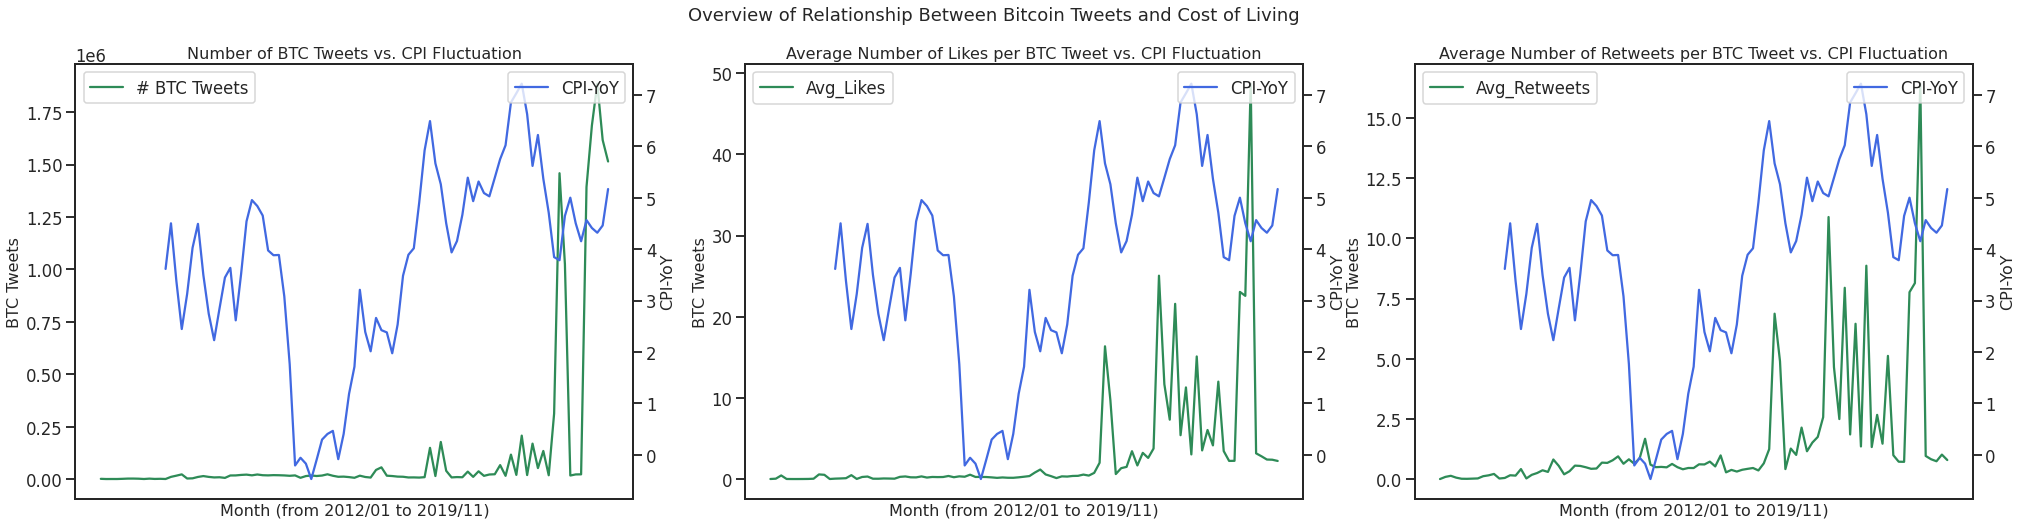

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(34, 8))


sns.lineplot(x='year_month', y='btc_tweets_cnt',
              data=df,ax=axes[0],label = '# BTC Tweets',
            color = 'seagreen')
axes[0].set_title(f"Number of BTC Tweets vs. CPI Fluctuation",fontsize=16)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[0].set_ylabel(f"BTC Tweets",fontsize = 16)
axes[0].set_xticks(())
axes[0].legend(loc=0)
# axes[0].grid(linestyle="--", alpha=0.7)
ax0_y = axes[0].twinx()
sns.lineplot(x='year_month', y='cpi_year_diff', 
              data=cpi_df, ax=ax0_y, label = 'CPI-YoY',
            color = 'royalblue'
)
ax0_y.set_xticks(())
ax0_y.set_ylabel(f"CPI-YoY",fontsize = 16)
ax0_y.legend(loc=1)


sns.lineplot(x='year_month', y='avg_btc_tweets_likes',
              data=df,ax=axes[1],label = 'Avg_Likes',
            color = 'seagreen')
axes[1].set_title(f"Average Number of Likes per BTC Tweet vs. CPI Fluctuation",fontsize=16)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[1].set_ylabel(f"BTC Tweets",fontsize = 16)
axes[1].set_xticks(())
axes[1].legend(loc=0)
# axes[1].grid(linestyle="--", alpha=0.7)
ax1_y = axes[1].twinx()
sns.lineplot(x='year_month', y='cpi_year_diff', 
              data=cpi_df, ax=ax1_y, label = 'CPI-YoY',
            color = 'royalblue'
)
ax1_y.set_xticks(())
ax1_y.set_ylabel(f"CPI-YoY",fontsize = 16)
ax1_y.legend(loc=1)

sns.lineplot(x='year_month', y='avg_btc_tweets_retweets',
              data=df,ax=axes[2], label = 'Avg_Retweets',
            color = 'seagreen')
axes[2].set_title(f"Average Number of Retweets per BTC Tweet vs. CPI Fluctuation",fontsize=16)
axes[2].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[2].set_ylabel(f"BTC Tweets",fontsize = 16)
axes[2].set_xticks(())
axes[2].legend(loc=0)
# axes[2].grid(linestyle="--", alpha=0.7)
ax2_y = axes[2].twinx()
sns.lineplot(x='year_month', y='cpi_year_diff', 
              data=cpi_df, ax=ax2_y, label = 'CPI-YoY',
            color = 'royalblue'
)
ax2_y.set_xticks(())
ax2_y.set_ylabel(f"CPI-YoY",fontsize = 16)
ax2_y.legend(loc=1)

fig.suptitle("Overview of Relationship Between Bitcoin Tweets and Cost of Living", fontsize = 18)
plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_crypto_cost_lineplot.png',dpi=300)
plt.show()


# Time Series Analysis

## Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_statistics(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('Augmented Dickey-Fuller Test: CPI-U')
augmented_dickey_fuller_statistics(X_train_transformed['Gold'])

print('Augmented Dickey-Fuller Test: Crypto Sentiments')
augmented_dickey_fuller_statistics(X_train_transformed['Gold'])

## Granger Causality Test